<a href="https://colab.research.google.com/github/JinMizar/ds3001_final_project/blob/main/result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/JinMizar/ds3001_final_project.git

Cloning into 'ds3001_final_project'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 66 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 981.07 KiB | 2.96 MiB/s, done.
Resolving deltas: 100% (29/29), done.


# Result: DS3001 Final Project
**Team Members**: Jinhong Zhao, Tong Zhou, Hanna Svenson

---
### Prediction Question
**Which chemical properties of Portuguese red wine are most predictive of high-quality wine (scores 7 and 8)?**

Our analysis aims to provide actionable insights for wine producers and consumers by identifying the chemical properties most strongly associated with high-quality wines and evaluating the predictive accuracy of our classification model.


In [9]:
#Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV


In [5]:
df = pd.read_csv('ds3001_final_project/data/WineQT.csv')

#we focus on predicting the best wines (scores 7 and 8 or just the 8's) instead of trying to predict 3 categories.
def categorize_quality(rating):
    return 1 if rating >= 7 else 0  #1 if High-quality

df['quality_binary'] = df['quality'].apply(categorize_quality)

X = df.drop(columns=['quality', 'quality_binary'])
y = df['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for PCA and Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Data Preparation
The dataset includes chemical properties of Portuguese red wines, and wines were classified into two categories: high-quality (scores ≥ 7) and not high-quality (scores < 7). Features were standardized using `StandardScaler` to ensure comparability for dimensionality reduction and modeling.


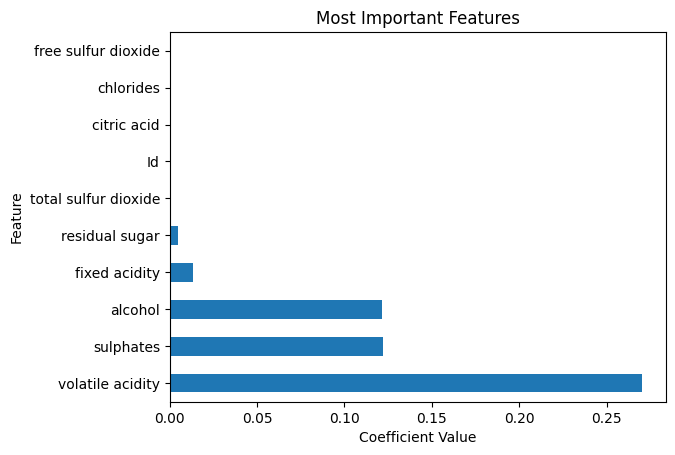

In [18]:
lasso = LassoCV(cv=5).fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index=X.columns)

# Plot top features
top_features = coef.abs().sort_values(ascending=False).head(10)
top_features.plot(kind='barh')
plt.title("Most Important Features")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

As mention from the pre-analysis, We consider using Lasso regression in the later analysis to minimize the impact of correlated variables and identify the most important chemical properties.

## Logistic Regression Performance (Baseline)

In [17]:
#Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=500).fit(X_train_scaled, y_train)

y_hat_train = log_reg.predict(X_train_scaled)
y_hat_test = log_reg.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_hat_test))



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       201
           1       0.60      0.54      0.57        28

    accuracy                           0.90       229
   macro avg       0.77      0.74      0.75       229
weighted avg       0.90      0.90      0.90       229



An overall accuracy of 90% was achieved in the Logistic Regression model, where the model was able to classify the majority class (non-high-quality wines) with high precision (94%) and recall (95%). However, with the evaluation of the classification model on the minority class (high-quality wines), there was still a moderate performance with a precision of 60%, recall of 54%, and F1-score of 57%. The macro averageF1-score was 75%, which indicates the imbalanced nature of our class distribution. Although the model is quite good at predicting wines that are not of high quality, its accuracy when predicting high quality wines could be improved, and it would be beneficial to balance the two classes and improve feature selection.

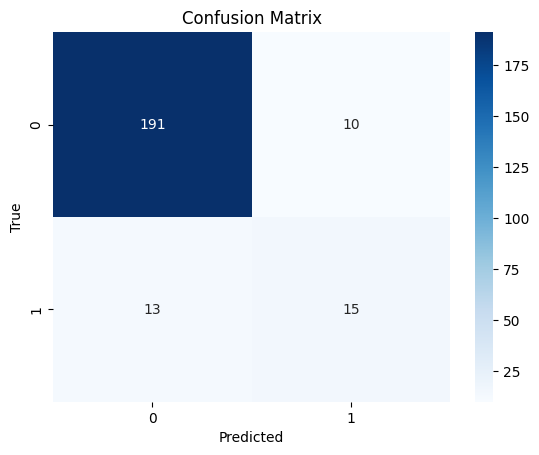

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_hat_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Here is the confusion matrix for the Baseline Logistic Regression model and we can clearly observe the class imbalance problem. The model identifies the majority class (non-high quality wines) well, with 191 true negatives and only 10 false positives. But here it has a hard time with the minority class (which is high-quality wines), correctly predicting 15 true positives, and mistaking 13 high-quality wines as non-high-quality (false negatives). This imbalance in performance underscores the need for strategies to improve recall for high-quality wines, such as addressing class imbalance or exploring alternative models.

## Improved Model Result

I am thinking should we use linear regression as our baseline model and claim logistic regression be our improved model result? Or should we try something else to improve the model then do an analysis on that model?

## Visualizations

## Discussion of Findings

## Conclusion